<a href="https://colab.research.google.com/github/lukas-kramer07/Classification_FashionMNIST/blob/main/Classification_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models

## V1

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 10s 4ms/step - loss: 1.2201 - accuracy: 0.7517 - val_loss: 0.5669 - val_accuracy: 0.7974
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5002 - accuracy: 0.8242 - val_loss: 0.5539 - val_accuracy: 0.8182
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4442 - accuracy: 0.8419 - val_loss: 0.4846 - val_accuracy: 0.8208
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4127 - accuracy: 0.8531 - val_loss: 0.4600 - val_accuracy: 0.8407
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4014 - accuracy: 0.8551 - val_loss: 0.4378 - val_accuracy: 0.8428
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3763 - accuracy: 0.8644 - val_loss: 0.4848 - val_accuracy: 0.8231
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - l

313/313 [==============================] - 1s 2ms/step


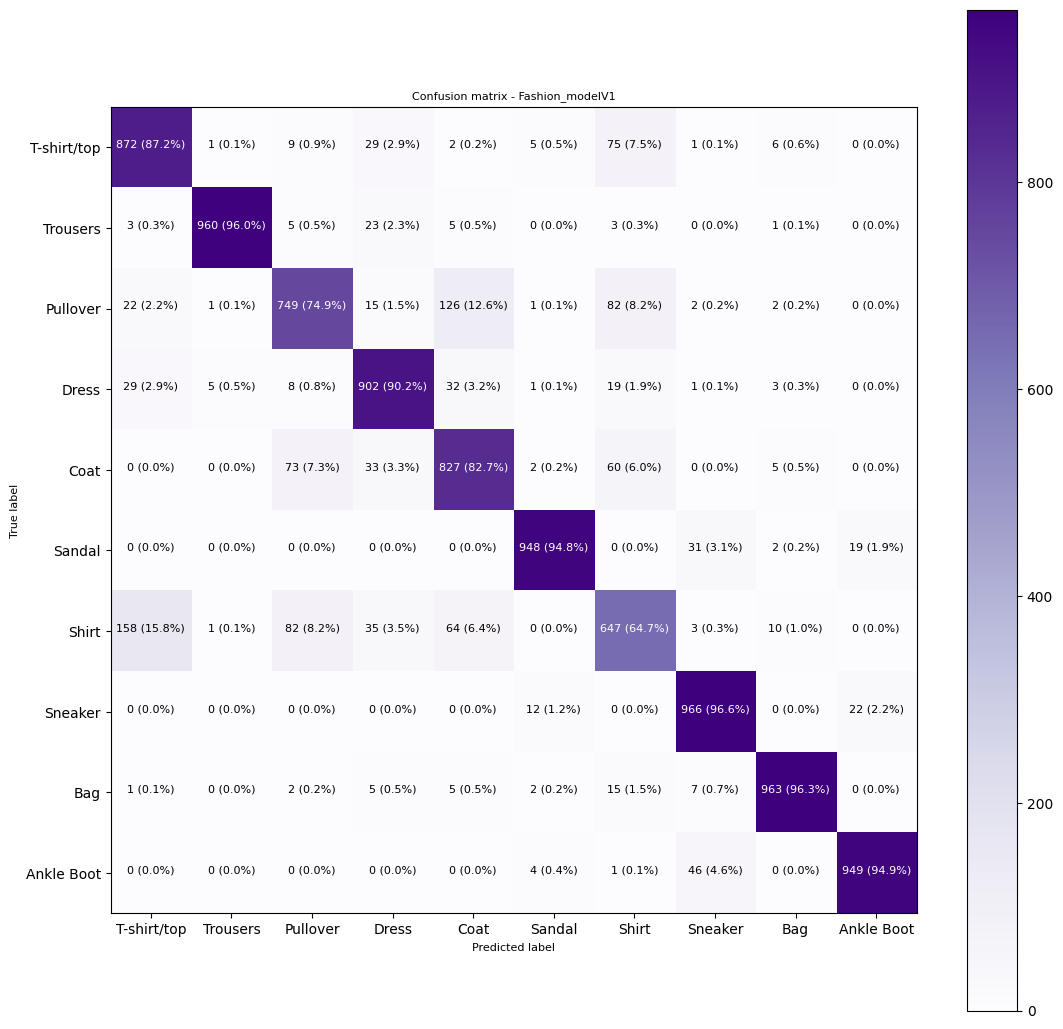

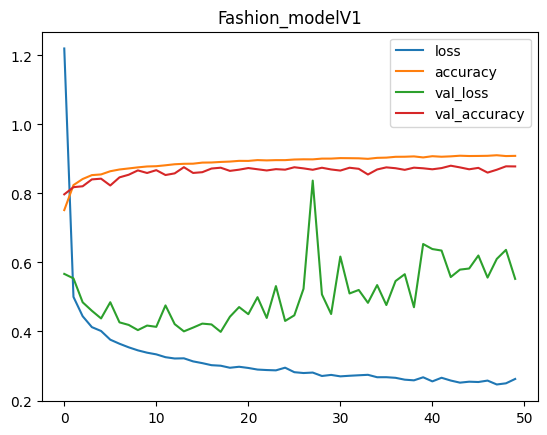

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Create a confusion matrix
# Note: Adapted from scikit-learn's plot_confusion_matrix()

import itertools
from sklearn.metrics import confusion_matrix

class_names = ["T-shirt/top","Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10,), text_size=15):
  #Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes= cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Purples)
  fig.colorbar(cax)

#set labels to be classes
  labels = classes if classes else np.arange(cm.shape[0])
  # Label the axes
  ax.set(title="Confusion matrix - Fashion_modelV1",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set coluor threshhold
  threshold = (cm.max() + cm.min())/2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)







# The data has already been sorted into training and test sets 
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
norm_history = model.fit(train_data,
                          train_labels,
                          epochs=50,
                          validation_data=(test_data, test_labels))


model.save("Fashion_modelV1")

y_probs = model.predict(test_data)
y_preds = tf.argmax(y_probs, axis=1)


make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13,13),
                      text_size=8)
pd.DataFrame(norm_history.history).plot(title="Fashion_modelV1")
plt.show()

## V2

Epoch 1/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.7764 - accuracy: 0.7827 - val_loss: 0.5951 - val_accuracy: 0.7890
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4659 - accuracy: 0.8336 - val_loss: 0.5115 - val_accuracy: 0.8244
Epoch 3/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4233 - accuracy: 0.8495 - val_loss: 0.4831 - val_accuracy: 0.8340
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3951 - accuracy: 0.8610 - val_loss: 0.4350 - val_accuracy: 0.8499
Epoch 5/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3753 - accuracy: 0.8662 - val_loss: 0.4077 - val_accuracy: 0.8566
Epoch 6/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3592 - accuracy: 0.8719 - val_loss: 0.4204 - val_accuracy: 0.8524
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3449 - accuracy: 0.8778 - val_loss: 0.4006 -

313/313 [==============================] - 1s 3ms/step


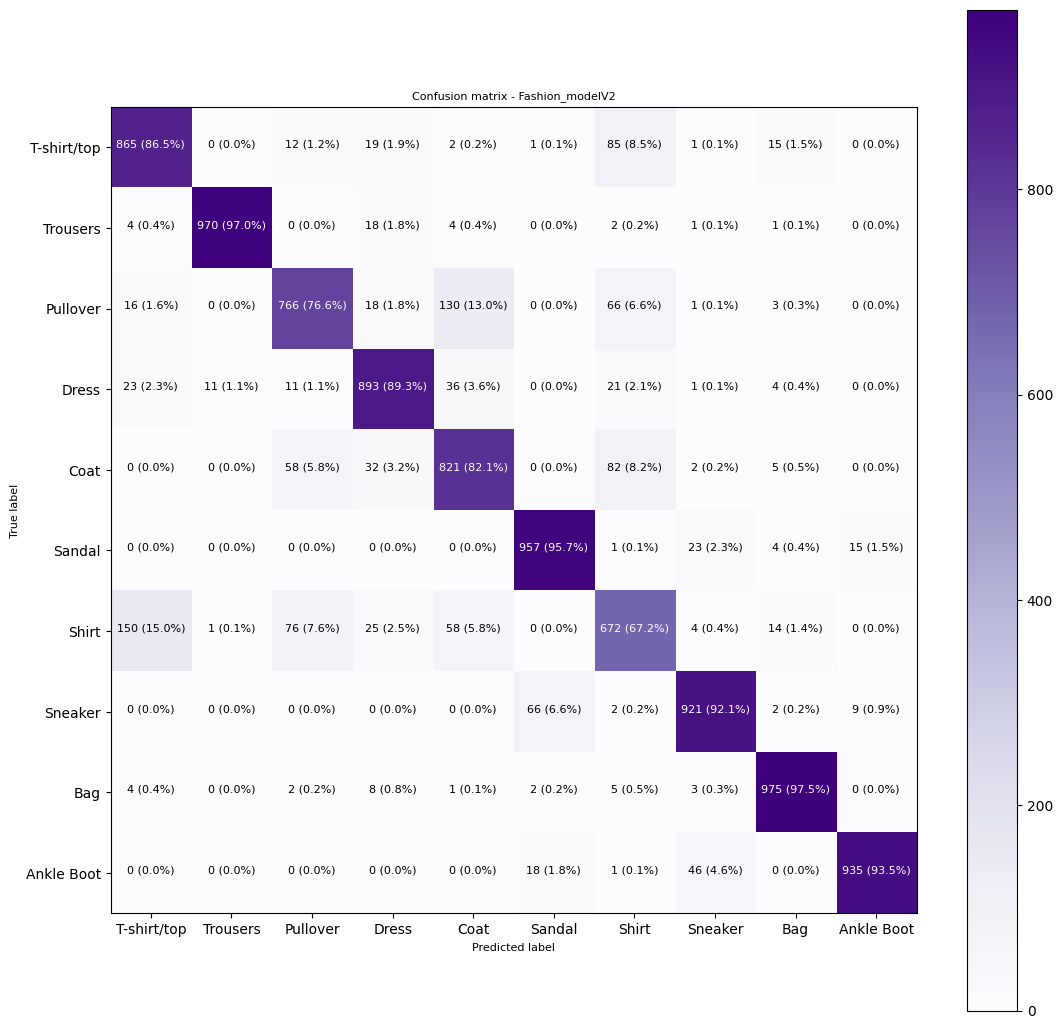

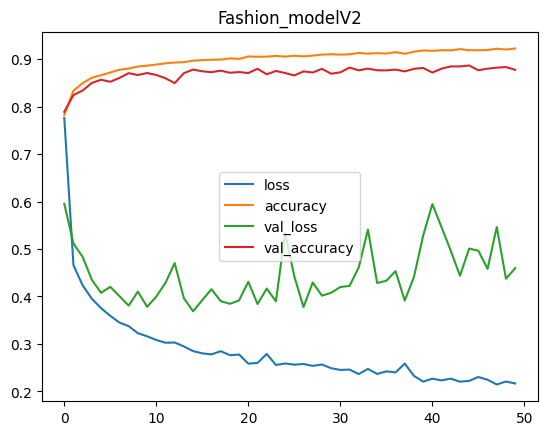

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Create a confusion matrix
# Note: Adapted from scikit-learn's plot_confusion_matrix()

import itertools
from sklearn.metrics import confusion_matrix

class_names = ["T-shirt/top","Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10,), text_size=15):
  #Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes= cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Purples)
  fig.colorbar(cax)

#set labels to be classes
  labels = classes if classes else np.arange(cm.shape[0])
  # Label the axes
  ax.set(title="Confusion matrix - Fashion_modelV2",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set coluor threshhold
  threshold = (cm.max() + cm.min())/2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)







# The data has already been sorted into training and test sets 
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
bigger_history = model.fit(train_data,
                          train_labels,
                          epochs=50,
                          validation_data=(test_data, test_labels))


model.save("Fashion_modelV2")

y_probs = model.predict(test_data)
y_preds = tf.argmax(y_probs, axis=1)


make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13,13),
                      text_size=8)
pd.DataFrame(bigger_history.history).plot(title="Fashion_modelV2")
plt.show()

## V3

Epoch 1/50
1875/1875 [==============================] - 52s 27ms/step - loss: 0.6846 - accuracy: 0.7414 - val_loss: 0.4942 - val_accuracy: 0.8139
Epoch 2/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5413 - accuracy: 0.7968 - val_loss: 0.4559 - val_accuracy: 0.8349
Epoch 3/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5064 - accuracy: 0.8098 - val_loss: 0.4490 - val_accuracy: 0.8281
Epoch 4/50
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4787 - accuracy: 0.8192 - val_loss: 0.4321 - val_accuracy: 0.8440
Epoch 5/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4614 - accuracy: 0.8272 - val_loss: 0.4186 - val_accuracy: 0.8475
Epoch 6/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4441 - accuracy: 0.8345 - val_loss: 0.4290 - val_accuracy: 0.8401
Epoch 7/50
1875/1875 [==============================] - 48s 26ms/step - loss: 0.4357 - accuracy: 0.8370 - val_loss: 0.3891 -

313/313 [==============================] - 1s 3ms/step


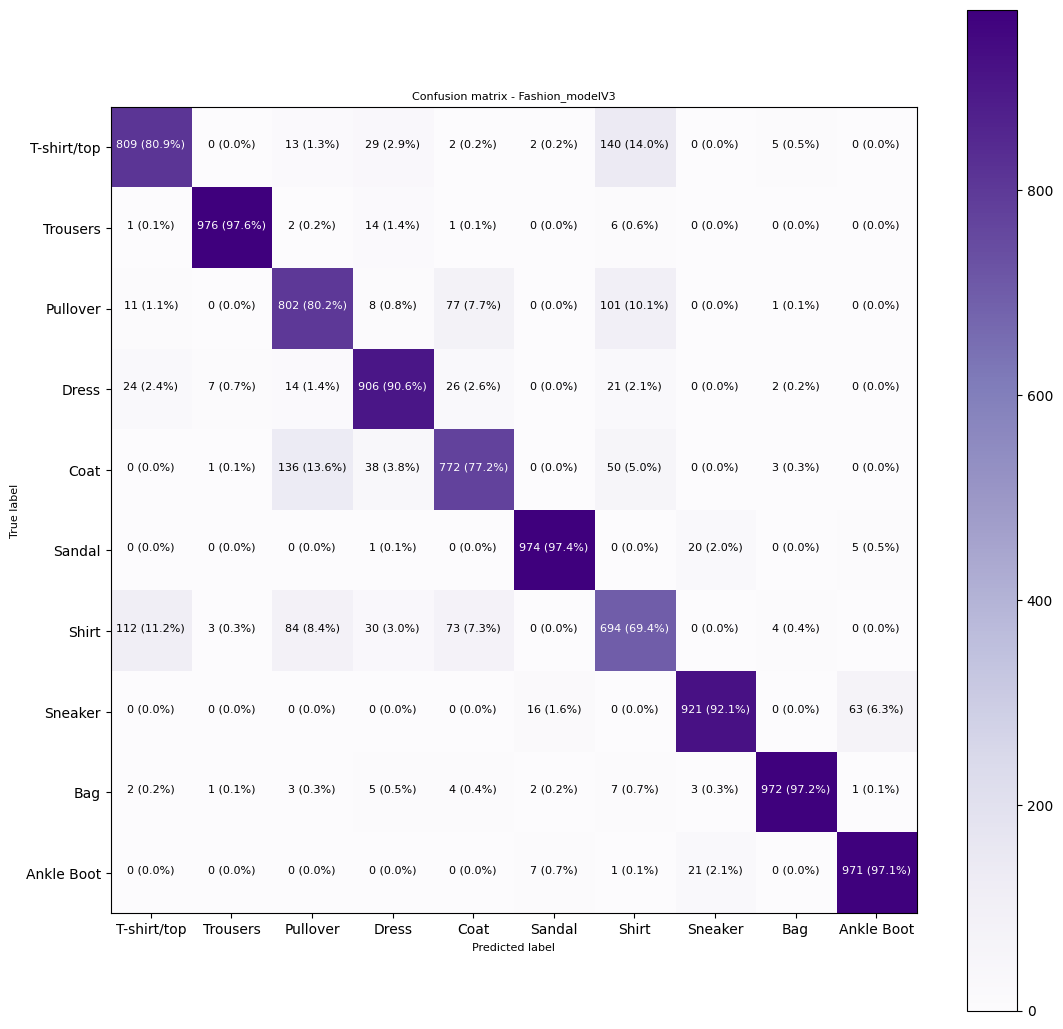

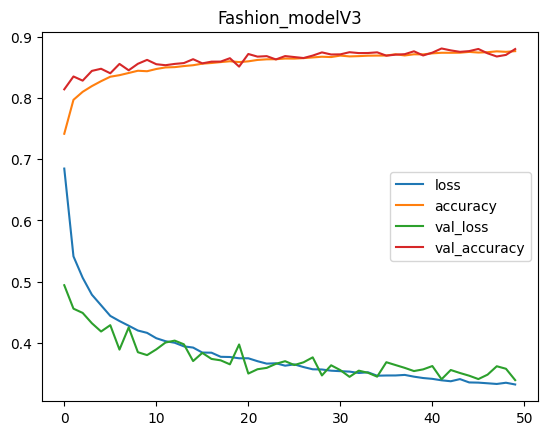

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Create a confusion matrix
# Note: Adapted from scikit-learn's plot_confusion_matrix()

import itertools
from sklearn.metrics import confusion_matrix

class_names = ["T-shirt/top","Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10,), text_size=15):
  #Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes= cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Purples)
  fig.colorbar(cax)

#set labels to be classes
  labels = classes if classes else np.arange(cm.shape[0])
  # Label the axes
  ax.set(title="Confusion matrix - Fashion_modelV3",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set coluor threshhold
  threshold = (cm.max() + cm.min())/2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)







# The data has already been sorted into training and test sets 
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()
# We can normalize our training data by deviding by the max (255)
train_data_norm = train_data/255
test_data_norm = test_data/255
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.02, size=image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

# Create an instance of the ImageDataGenerator class for data augmentation
data_augmenter = ImageDataGenerator(
    rotation_range=10,  # rotate the image up to 10 degrees
    width_shift_range=0.05,  
    height_shift_range=0.05,  
    horizontal_flip=True,  # flip the image horizontally
    vertical_flip=False,  # do not flip the image vertically
    zoom_range=0.05,  # zoom in/out up to 5%
    fill_mode='nearest',  # fill gaps in the image with the nearest pixel
    preprocessing_function=add_noise  # Add the add_noise function as the preprocessing function
)

# Fit the data augmenter on the training data
data_augmenter.fit(tf.expand_dims(train_data_norm, 3))

# Train the model on the augmented data
augmented_history = model.fit(
    data_augmenter.flow(tf.expand_dims(train_data_norm, -1), train_labels),
    epochs=50,
    validation_data=(tf.expand_dims(test_data_norm, -1), test_labels),
    )


model.save("Fashion_modelV3")

y_probs = model.predict(test_data_norm)
y_preds = tf.argmax(y_probs, axis=1)


make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13,13),
                      text_size=8)
pd.DataFrame(augmented_history.history).plot(title="Fashion_modelV3")
plt.show()

## V4

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/100
1875/1875 [==============================] - 62s 31ms/step - loss: 0.6817 - accuracy: 0.7412 - val_loss: 0.5138 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5423 - accuracy: 0.7958 - val_loss: 0.4449 - val_accuracy: 0.8347 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 46s 24ms/step - loss: 0.5036 - accuracy: 0.8125 - val_loss: 0.4338 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 44s 24ms/step - loss: 0.4787 - accuracy: 0.8207 - val_loss: 0.4357 - val_accuracy: 0.8376 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 44s 24ms/step - loss: 0.4616 - accuracy: 0.8265 - val_loss: 0.4284 - val_accuracy: 0.8399 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4428 - accuracy: 0.8334 - val_loss: 0.4272 - val_accurac

313/313 [==============================] - 1s 2ms/step


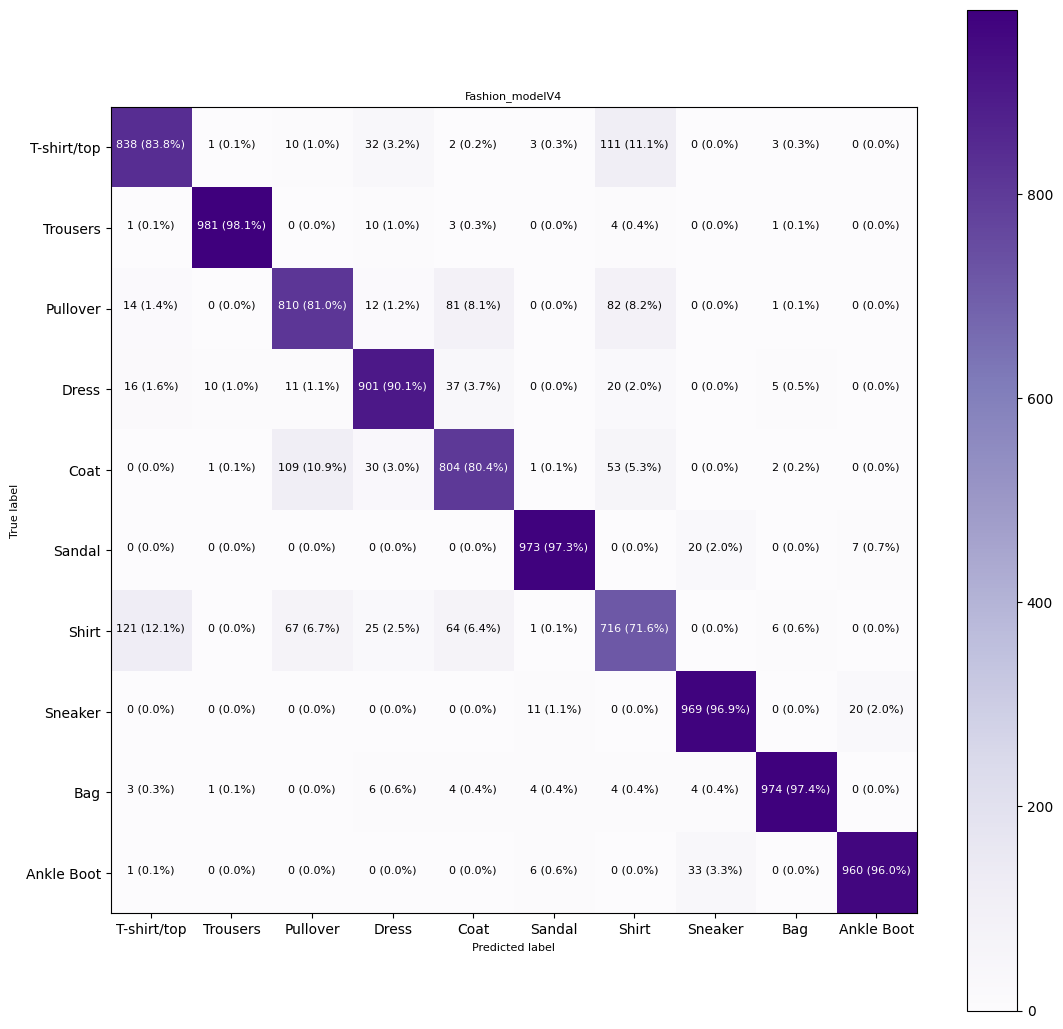

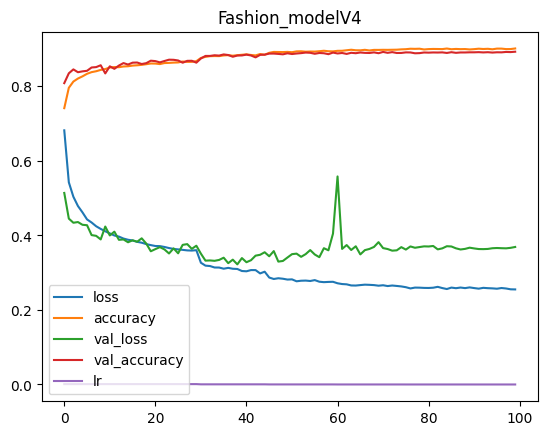

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import LearningRateScheduler

# Create a confusion matrix
# Note: Adapted from scikit-learn's plot_confusion_matrix()

import itertools
from sklearn.metrics import confusion_matrix

class_names = ["T-shirt/top","Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10,), text_size=15):
  #Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes= cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Purples)
  fig.colorbar(cax)

#set labels to be classes
  labels = classes if classes else np.arange(cm.shape[0])
  # Label the axes
  ax.set(title="Fashion_modelV4",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set coluor threshhold
  threshold = (cm.max() + cm.min())/2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)







# The data has already been sorted into training and test sets 
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()
# We can normalize our training data by deviding by the max (255)
train_data_norm = train_data/255
test_data_norm = test_data/255
tf.random.set_seed(42)

# Define a function that decreases the learning rate
def lr_schedule(epoch, lr):
  return lr * 0.4 if epoch % 15 == 0 and epoch > 15 else lr

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


#Data Augmentation
def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.02, size=image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

# Create an instance of the ImageDataGenerator class for data augmentation
data_augmenter = ImageDataGenerator(
    rotation_range=10,  # rotate the image up to 10 degrees
    width_shift_range=0.05,  
    height_shift_range=0.05,  
    horizontal_flip=True,  # flip the image horizontally
    vertical_flip=False,  # do not flip the image vertically
    zoom_range=0.05,  # zoom in/out up to 5%
    fill_mode='nearest',  # fill gaps in the image with the nearest pixel
    preprocessing_function=add_noise  # Add the add_noise function as the preprocessing function
)

# Fit the data augmenter on the training data
data_augmenter.fit(tf.expand_dims(train_data_norm, 3))

# Train the model on the augmented data
augmented_history = model.fit(
    data_augmenter.flow(tf.expand_dims(train_data_norm, -1), train_labels),
    epochs=100,
    validation_data=(tf.expand_dims(test_data_norm, -1), test_labels),
    callbacks=[lr_scheduler]
    )


model.save("Fashion_modelV4")

y_probs = model.predict(test_data_norm)
y_preds = tf.argmax(y_probs, axis=1)


make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13,13),
                      text_size=8)
pd.DataFrame(augmented_history.history).plot(title="Fashion_modelV4")
plt.show()

# Classification

In [ ]:
import os
from pathlib import Path
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model_name = "Fashion_modelV3"
model = tf.keras.models.load_model(model_name)

# Define the class names
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Define the image folder
folder = "imageFolder"

#function to crop and square an image to a specified size so that it doesn't become distorted
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    return cv2.resize(crop_img, (size, size), interpolation=interpolation)

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to 28x28
    img = crop_square(img, 28)
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    # Normalize the image
    img = img / 255.0
    # Reshape the image to (28, 28, 1)
    return img

def predict_image(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Make a prediction
    y_prob = model.predict(img.reshape(1, 28,28))                                                                                                                                                                                                                           # type: ignore

    #print the probabilities
    print("Probabilities:\n")
    for i in range(len(class_names)):
        probability = float(tf.squeeze(y_prob)[i])*100                                                                                                                                                                                                                      # type: ignore
        rounded_probability = np.round(probability, decimals=1)
        print(f"{class_names[i]}: {rounded_probability}%")

    y_pred = np.argmax(y_prob[0])
    # return the class name
    return class_names[y_pred]




# Copy the respective image into a new folder Right or Wrong depending on the prediction. These folders are created for the respective model used for the prediction
def copy_image(image_path, model_name, label):
    # Get the image file name and extension
    image_filename = os.path.basename(image_path)

    label = label.replace("/","_") #"T-shirt/Top" can't be a folder name
    
    # Create the new folder path based on the model name and correctness
    new_folder = Path('Predictions_allClasses', model_name, label)
    
    # Create the new folder if it doesn't exist
    new_folder.mkdir(parents=True, exist_ok=True)
    
    # Construct the new image path
    new_image_path = new_folder / image_filename
    
    # Copy the image to the new path
    shutil.copy(image_path, new_image_path)
    
    print(f"Image copied to: {new_image_path}")


#############
# Main function: Predicts every image form the image folder and creates a copy in a respective folder
#############
def main():

    # Iterate over each file in the folder
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        print(f"Choosen image: {image_path}\n")

        #predict the label
        prediction = predict_image(image_path)
        print(f"\nPrediciton: {prediction}")

        if os.path.isfile(image_path):
            copy_image(image_path, model_name, prediction)



if __name__ == "__main__":
    main()

Choosen image: imageFolder/gdecdasc.jpg

1/1 [==============================] - 0s 84ms/step
Probabilities:

T-shirt/top: 0.0%
Trousers: 0.0%
Pullover: 66.0%
Dress: 0.0%
Coat: 33.5%
Sandal: 0.0%
Shirt: 0.4%
Sneaker: 0.0%
Bag: 0.0%
Ankle Boot: 0.0%

Prediciton: Pullover
Image copied to: Predictions_allClasses/Fashion_modelV3/Pullover/gdecdasc.jpg
Choosen image: imageFolder/gfdscvdsvsd.jpg

1/1 [==============================] - 0s 27ms/step
Probabilities:

T-shirt/top: 1.4%
Trousers: 6.4%
Pullover: 0.1%
Dress: 89.6%
Coat: 0.6%
Sandal: 0.0%
Shirt: 0.6%
Sneaker: 0.0%
Bag: 1.4%
Ankle Boot: 0.0%

Prediciton: Dress
Image copied to: Predictions_allClasses/Fashion_modelV3/Dress/gfdscvdsvsd.jpg
Choosen image: imageFolder/wscsdcwer.jpg

1/1 [==============================] - 0s 21ms/step
Probabilities:

T-shirt/top: 0.0%
Trousers: 0.0%
Pullover: 80.6%
Dress: 0.0%
Coat: 18.5%
Sandal: 0.0%
Shirt: 0.8%
Sneaker: 0.0%
Bag: 0.0%
Ankle Boot: 0.0%

Prediciton: Pullover
Image copied to: Predictions_allCl

# Demonstration_DataAugmenter

4422102/4422102 [==============================] - 1s 0us/step


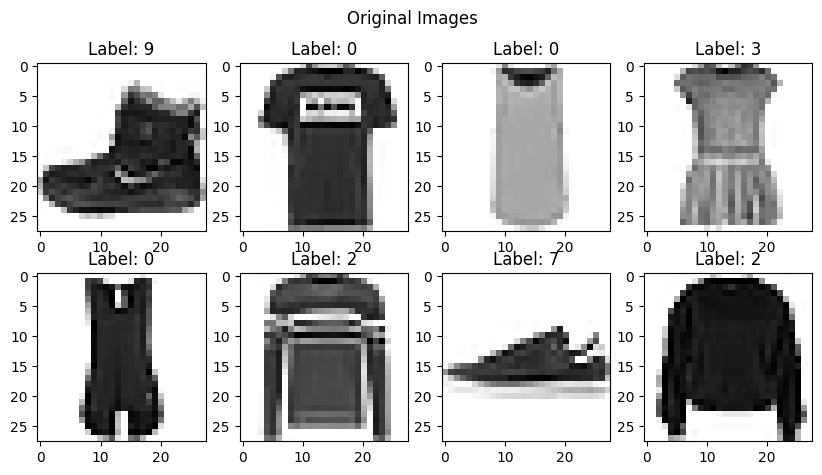

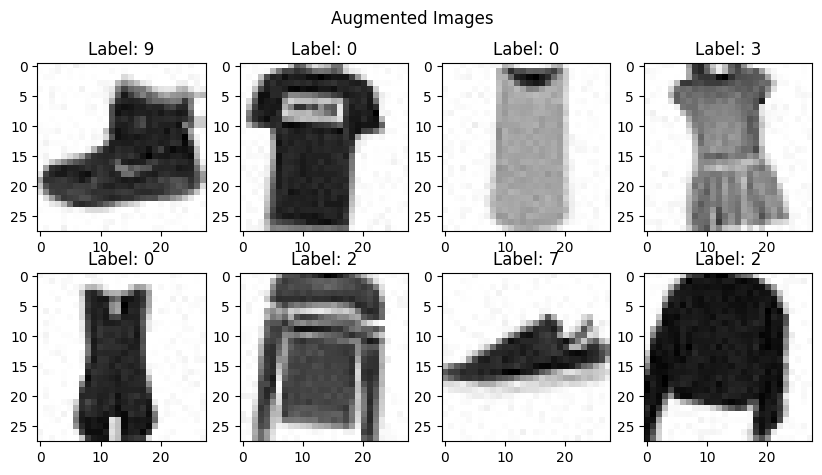

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist# type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator# type: ignore
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

# Normalize the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.02, size=image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

# Create an instance of the ImageDataGenerator class for data augmentation
data_augmenter = ImageDataGenerator(
    rotation_range=10,  # rotate the image up to 10 degrees
    width_shift_range=0.05,  
    height_shift_range=0.05,  
    horizontal_flip=True,  # flip the image horizontally
    vertical_flip=False,  # do not flip the image vertically
    zoom_range=0.05,  # zoom in/out up to 5%
    fill_mode='nearest',  # fill gaps in the image with the nearest pixel
    preprocessing_function=add_noise  # Add the add_noise function as the preprocessing function
)

# Fit the data augmenter on the training data
data_augmenter.fit(tf.expand_dims(train_data_norm, 3))

# Display some of the original images
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_norm[i], cmap='binary')
    ax.set_title(f'Label: {train_labels[i]}')
plt.suptitle('Original Images')
plt.show()

# Display some of the augmented images
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    augmented_image, _ = data_augmenter.flow(
        tf.expand_dims(tf.expand_dims(train_data_norm[i], 0),-1),
        train_labels[i].reshape(1,)
    ).next()
    ax.imshow(augmented_image.squeeze(), cmap='binary')
    ax.set_title(f'Label: {train_labels[i]}')
plt.suptitle('Augmented Images')
plt.show()

# Demonstration_random_picture_pred

Choosen image: imageFolder/wwergfgwer.jpg

1/1 [==============================] - 0s 197ms/step
Probabilities:

T-shirt/top: 0.1%
Trousers: 0.0%
Pullover: 83.3%
Dress: 0.2%
Coat: 5.8%
Sandal: 0.2%
Shirt: 9.2%
Sneaker: 0.0%
Bag: 1.3%
Ankle Boot: 0.0%

Prediciton: Pullover


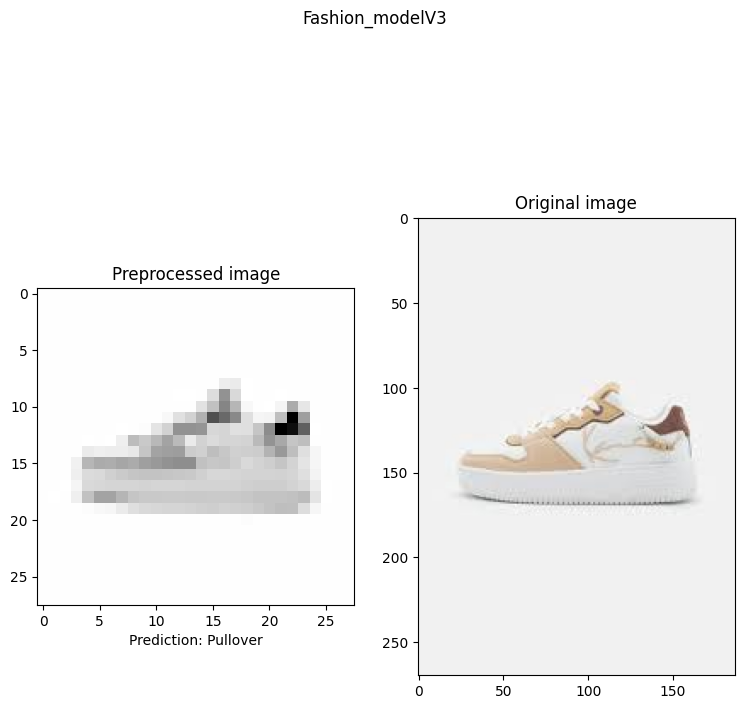

In [ ]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model_name = "Fashion_modelV3"
model = tf.keras.models.load_model(model_name)

# Define the class names
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Get a list of image file paths in the folder
folder = "imageFolder"
image_paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".jpg") or f.endswith(".jpgeg")]

# Select a random image from the folder
random_image_path = random.choice(image_paths)


#function to crop and square an image to a specified size so that it doesn't become distorted
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]

    return cv2.resize(crop_img, (size, size), interpolation=interpolation)

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to 28x28
    img = crop_square(img, 28)
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    # Normalize the image
    img = img / 255.0
    # Reshape the image to (28, 28, 1)
    return img

def predict_image():
    # Preprocess the image
    img = preprocess_image(random_image_path)
    # Make a prediction
    y_prob = model.predict(img.reshape(1, 28,28)) 

    #print the probabilities
    print("Probabilities:\n")
    for i in range(len(class_names)):
        probability = float(tf.squeeze(y_prob)[i])*100 
        rounded_probability = np.round(probability, decimals=1)
        print(f"{class_names[i]}: {rounded_probability}%")

    y_pred = np.argmax(y_prob[0])
    # return the class name
    return class_names[y_pred]


def main():

    #print(f"Image paths: {image_paths};")  //prints all the image paths
    print(f"Choosen image: {random_image_path}\n")

    #predict the label
    prediction = predict_image()
    print(f"\nPrediciton: {prediction}")


    #show preprocessed and original image
    plt.figure(figsize=(9,9))
    plt.suptitle(model_name)
    plt.subplot(1,2,1)
    plt.imshow(preprocess_image(random_image_path), cmap=plt.cm.binary) 
    plt.title("Preprocessed image")
    plt.xlabel(f"Prediction: {prediction}")


    plt.subplot(1,2,2)
    original_img = cv2.imread(random_image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) #opencv reads and displays an image as BGR format instead of RGB color format. Whereas matplotlib uses RGB color format to display image --> Converts from BGR to RGB
    plt.imshow(original_img)
    plt.title("Original image")
    plt.show()

if __name__ == "__main__":
    main()

# Right_Wrong

In [ ]:
import os
from pathlib import Path
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model_name = "Fashion_modelV4"
normalized = True
model = tf.keras.models.load_model(model_name)

# Define the class names
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Define the image folder
folder = "imageFolder"

#function to crop and square an image to a specified size so that it doesn't become distorted
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    return cv2.resize(crop_img, (size, size), interpolation=interpolation)

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to 28x28
    img = crop_square(img, 28)
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    if normalized:
        # Normalize the image
        img = img / 255.0
    # Reshape the image to (28, 28, 1)
    return img

def predict_image(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Make a prediction
    y_prob = model.predict(img.reshape(1, 28,28))                                                                                                                                                                                                                                                   

    #print the probabilities
    print("Probabilities:\n")
    for i in range(len(class_names)):
        probability = float(tf.squeeze(y_prob)[i])*100                                                                                                                                                                                                                                              
        rounded_probability = np.round(probability, decimals=1)
        print(f"{class_names[i]}: {rounded_probability}%")

    y_pred = np.argmax(y_prob[0])
    # return the class name
    return class_names[y_pred]




# Copy the respective image into a new folder Right or Wrong depending on the prediction. These folders are created for the respective model used for the prediction
def copy_image(image_path, model_name, is_correct):
    # Get the image file name and extension
    image_filename = os.path.basename(image_path)
    
    # Create the new folder path based on the model name and correctness
    new_folder = Path('Predictions_Right_Wrong', model_name, 'Right' if is_correct else 'Wrong')
    
    # Create the new folder if it doesn't exist
    new_folder.mkdir(parents=True, exist_ok=True)
    
    # Construct the new image path
    new_image_path = new_folder / image_filename
    
    # Copy the image to the new path
    shutil.copy(image_path, new_image_path)
    
    print(f"Image copied to: {new_image_path}")

# Computes the accuracy depending on the number of wrong and right predictions
def compute_accuracy(right_count, wrong_count):
    total_count = right_count + wrong_count
    return 0.0 if total_count == 0 else (right_count / total_count) * 100



#############
# Main function: Predicts every image form the image folder. The user then has to input whether the prediciton is right or wrong, after which the image is copied into a respective folder "Right" or "Wrong" for the model. 
# The accuracy of the model is determined using the number of wrong and right pictures
#############
def main():

    right_count = 0
    wrong_count = 0

    # Iterate over each file in the folder
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        
        #print(f"Image paths: {image_paths};")  //prints all the image paths
        print(f"Choosen image: {image_path}\n")

        #predict the label
        prediction = predict_image(image_path)
        print(f"\nPrediciton: {prediction}")


        #show preprocessed and original image
        #preprocessed image
        plt.figure(figsize=(9,9))
        plt.suptitle(model_name)
        plt.subplot(1,2,1)
        plt.imshow(preprocess_image(image_path), cmap=plt.cm.binary) 
        plt.title("Preprocessed image")
        plt.xlabel(f"Prediction: {prediction}")
        #original image
        plt.subplot(1,2,2)
        original_img = cv2.imread(image_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) #opencv reads and displays an image as BGR format instead of RGB color format. Whereas matplotlib uses RGB color format to display image --> Converts from BGR to RGB
        plt.imshow(original_img)
        plt.title("Original image")
        plt.show()


        # user input whether the prediction is right or wrong
        user_input = input("Enter 'right' or 'wrong': ")

        if os.path.isfile(image_path):
            if user_input.lower() == "right" or user_input == "1":
                copy_image(image_path, model_name, True)
                right_count += 1
            elif user_input.lower() == "wrong" or user_input == "0":
                copy_image(image_path, model_name, False)
                wrong_count += 1
            else:
                print("Invalid input. Please enter 'right' or 'wrong'.")

    # Compute accuracy
    accuracy = compute_accuracy(right_count, wrong_count)
    print(f"Accuracy: {accuracy}%")



if __name__ == "__main__":
        main()